<a href="https://colab.research.google.com/github/dani-lbnl/2022_als_user_meeting/blob/main/04_binarypartition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALS User Meeting 2022
This notebook describes methods to extract key information from microCT image stacks
- Thresholding techniques
- Image enhancing techniques
- Differential operators for edge detection

Created by Dani Ushizima, CAMERA, LBNL - Aug 1st 2022


In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import ndimage as ndi
import fnmatch,os
import matplotlib.pyplot as plt
from glob import glob

from skimage import img_as_ubyte, filters, morphology, exposure, io, restoration
from skimage.filters import threshold_isodata
from skimage.transform import pyramid_expand
from skimage.measure import regionprops,label


# 1. Read a microct image
- from url
- from NERSC
- from Google drive

## Read from NERSC
- discard this portion if running in Colab

In [ ]:
datapath = "/global/cfs/cdirs/als/users/yourname/yourdata/" #update these values
!ls -lt "$datapath"

In [ ]:
image = io.imread(datapath+'bead_pack.tif')

## Read from Google drive 
- discard this portion if running at NERSC

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
datapath = "/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/"
!ls -lt "$datapath"

total 7842
-rw------- 1 root root 8025493 Aug 11 16:46 bead_pack.tif
drwx------ 2 root root    4096 Aug 11 16:35 concrete


In [5]:
def loadFileNames(path,extension):
  ''' Return filename after using colab files.upload - work for 1 file'''
  fnames = glob(path+extension)
  fnames.sort()
  print(path);
  print(f"Number of files: {len(fnames)}")
  return fnames

In [6]:
files = loadFileNames(datapath+'concrete/','*tif')

/content/drive/My Drive/Colab Notebooks/ALS User Meeting 2022 colab/data/concrete/
Number of files: 20


# 2. Thresholding techniques
- use a slice to test many approaches


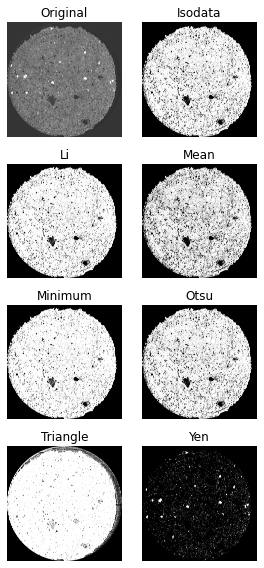

In [40]:
n = 5
aslice = io.imread(files[n])
t= filters.try_all_threshold(aslice, figsize=(4,8), verbose=False)
#plt.savefig("thresholdAll.png", bbox_inches='tight')

Text(0.5, 1.0, 'threshold_isodata')

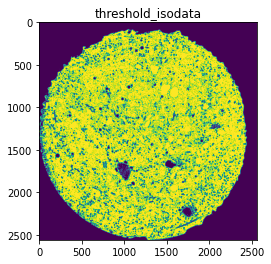

In [17]:
t=filters.threshold_isodata(aslice) #calculates the threshold
binary = aslice>t #apply to image
plt.imshow(binary)
plt.title('threshold_isodata')


In [21]:
def imshowcmp(before,after,lut='plasma'):
    '''Show 2 images side by side'''
    f, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(before,cmap=lut)
    ax[1].imshow(after,cmap=lut)

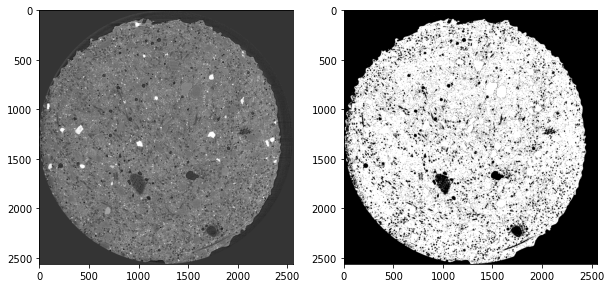

In [22]:
imshowcmp(aslice,binary,'gray')

# 3. Image enhancing techniques
- denoising: median, bilateral
- sharpening
- morphological operators 

In [41]:
aslice = aslice[1200:1700,1200:1700]

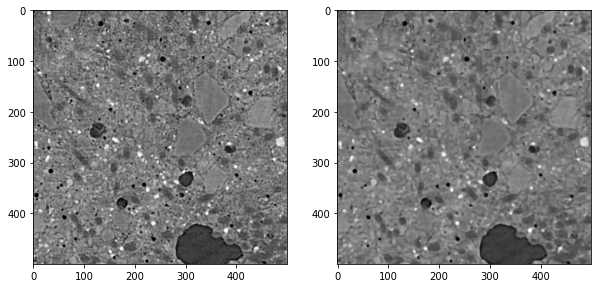

In [42]:
selem = morphology.diamond(3)
medianImage = filters.median(aslice,selem)
imshowcmp(aslice,medianImage,'gray')

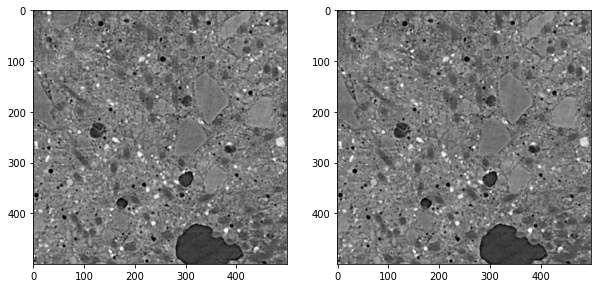

In [43]:
#from skimage import restoration
bilatImage = filters.rank.mean_bilateral(aslice,selem)
imshowcmp(aslice,bilatImage,'gray')

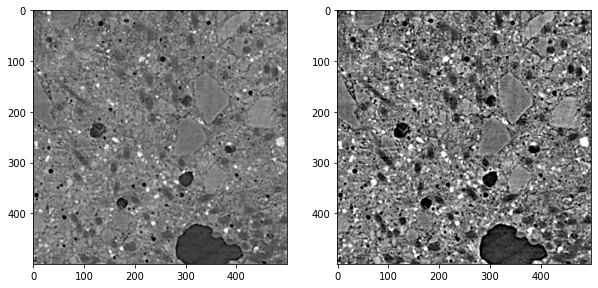

In [46]:
sharpImage = filters.unsharp_mask(aslice, radius=20, amount=1)
imshowcmp(aslice,sharpImage,'gray')

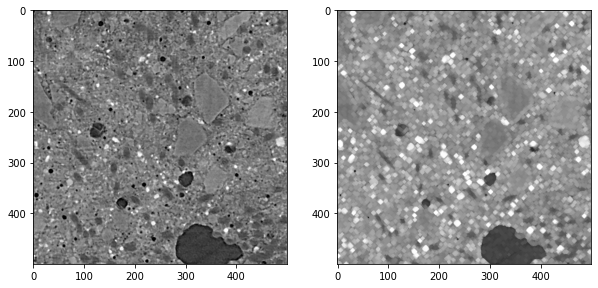

In [52]:
dilatImage = morphology.dilation(aslice,selem=selem)
imshowcmp(aslice,dilatImage,'gray')

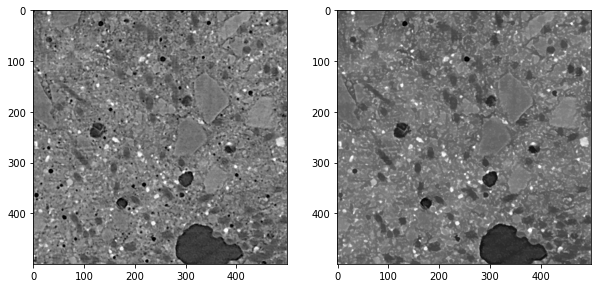

In [56]:
dilatImage = morphology.area_closing(aslice)
imshowcmp(aslice,dilatImage,'gray')

# 4. Differential operators for edge detection
- sobel
- other [options](,,,)

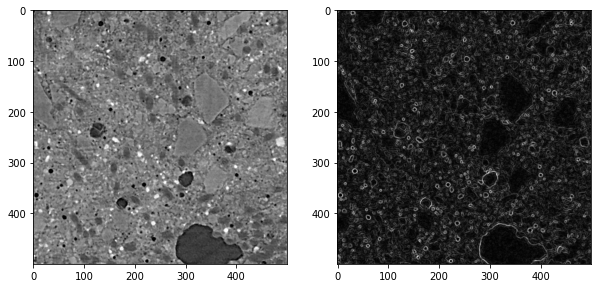

In [49]:
sobelImage = filters.sobel(aslice)
imshowcmp(aslice,sobelImage,'gray')